<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/MonteCarlo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCMC: MC simulation atoms

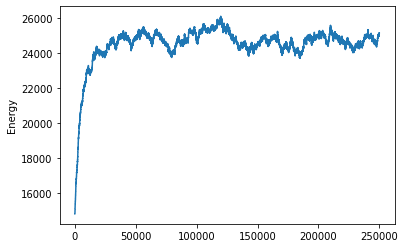

In [ ]:
from random import random,randrange
from math import exp,pi
from numpy import ones
from pylab import plot,ylabel,show

T = 10.0
N = 1000   # num of atoms
steps = 250000   # num of steps we want to simulate for Markov Chain Monte Carlo simulation

# Create a 2D array to store the quantum numbers
n = ones([N,3],int)

# Main loop
eplot = []
E = 3*N*pi*pi/2

for k in range(steps):

    # Choose the particle and the move
    i = randrange(N)   # randomly choose one atom
    j = randrange(3)   # randomly choose one move for nx, ny or nz
     
    if random()<0.5:   # randomly choose +1 move or -1 move
        dn = 1
        dE = (2*n[i,j]+1)*pi*pi/2
    else: 
        dn = -1
        dE = (-2*n[i,j]+1)*pi*pi/2

    # Decide whether to accept the move
    if n[i,j]>1 or dn==1:
        if random()<exp(-dE/T):
            n[i,j] += dn
            E += dE

    eplot.append(E)

# Make the graph
plot(eplot)
ylabel("Energy")
show()

# MCMC Peak finder with the Metropolis algorithm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.


x, y =  351.4901424590337 249.58520709648644  z =  4328.299571131553
x, y =  412.51363222935356 407.0344593326678  z =  13444.200118661616
x, y =  364.1176050851107 285.78147349364855  z =  12953.385354140068
x, y =  361.3445941626637 408.47600144829863  z =  7612.723661159058
x, y =  342.32357997647836 285.46655219724096  z =  12388.947722841847
x, y =  320.34194638665576 270.74615975074374  z =  7418.100197583414
x, y =  342.4553731935013 362.5934373114494  z =  4084.3195054387843
x, y =  374.6359636633933 402.9127085543708  z =  11635.755959246315
x, y =  347.0577599878065 374.3787397604632  z =  4002.4833493647525
x, y =  239.4920176304406 375.6104749914171  z =  2141.2732168906705
x, y =  362.02159755299715 268.00210531177464  z =  11416.651962808211
x, y =  312.2265064946285 268.8614923229698  z =  5434.581238130684
x, y =  403.0667369370479 308.77505901678217  z =  1999.7927264460213
x, y =  465.7840043479588 440.8035148500314  z =  325.22180701627286
x, y =  365.8642403633119 4

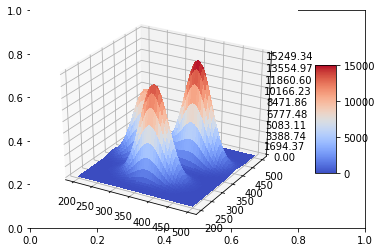

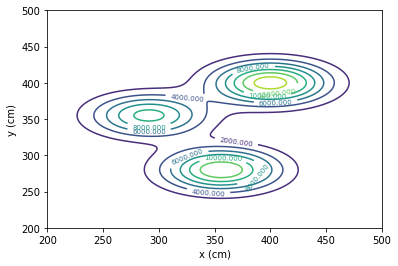

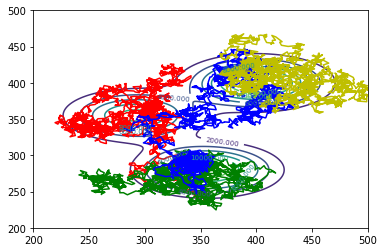

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
import time

np.random.seed(42)

# sum of three normal distributions to get three peaks with different amplitudes
def f(x,y):
    amp0, x0, y0 = 15245., 400, 400
    amp1, x1, y1 = 13871., 356., 280.
    amp2, x2, y2 = 10753., 291., 355.
    sigmax, sigmay = 35., 20
    
    return (amp0*np.exp(-(((x0-x)/sigmax)**2+((y0-y)/sigmay)**2)/2))+ \
           (amp1*np.exp(-(((x1-x)/sigmax)**2+((y1-y)/sigmay)**2)/2))+ \
           (amp2*np.exp(-(((x2-x)/sigmax)**2+((y2-y)/sigmay)**2)/2))

# Make data.
N = 300
a = 200.
b = 500.
h = (b-a)/N

X = np.linspace(a, b, N)
Y = np.linspace(a, b, N)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# MCMC points
xpoints = []
ypoints = []

# walk the next step
def walk_next(x, y):
    step = 3*h    # start with a smaller step
    Z_current = f(x, y)

    # use two gaussian distributions to randomly pick up a next position (x_new, y_new)
    x_new = x + np.random.normal(0., step)   
    y_new = y + np.random.normal(0., step)

    # make sure we are in the range
    while x_new < a or x_new > b or y_new < a or y_new > b:
        x_new = x + np.random.normal(0., step)
        y_new = y + np.random.normal(0., step)

    Z_next = f(x_new, y_new)
    
    # calculate the ratio and decide to accept or not
    urand = np.random.random()
    ratio = np.abs(Z_next/Z_current)
    # if the new position has a larger value of Z, the ratio will be greater than 1 and we will move to the new position
    # if the new position has a lower value of Z, we will calculate the ratio and compare with a random number between 0 and 1
    # we then apply the following condition to decide if we want to stay in the current position or move to the new position
    if ratio < urand:
        x_new = x
        y_new = y

    return x_new, y_new

# make the first plot to show the 3D surface
fig1, ax1 = plt.subplots()
ax1 = fig1.gca(projection='3d')

surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig1.colorbar(surf, shrink=0.5, aspect=5)

# randomly choose an initial position
x0, y0 = 350, 250

# Markov chain Monte Carlo
N_steps = 200000
for i in range(N_steps):
    xpoints.append(x0)
    ypoints.append(y0)

    x, y = walk_next(x0, y0)
    x0 = x
    y0 = y
    if i%10000 == 0:
        print("x, y = ", x0, y0, " z = ", f(x0, y0))

print("The actual global maximum is at (400, 400)")

# make the second plot to show the contour plot
fig2, ax2 = plt.subplots()
cp = ax2.contour(X, Y, Z)
ax2.clabel(cp, inline=1, fontsize=7)
ax2.set_xlabel('x (cm)')
ax2.set_ylabel('y (cm)')
#plt.plot(xpoints, ypoints)

# third plot
fig3, ax3 = plt.subplots()
cp = ax3.contour(X, Y, Z)
ax3.clabel(cp, inline=1, fontsize=7)
plt.plot(xpoints[:2000], ypoints[:2000], color="r")
plt.plot(xpoints[2000:4000], ypoints[2000:4000], color="g")
plt.plot(xpoints[4000:6000], ypoints[4000:6000], color="b")
plt.plot(xpoints[6000:8000], ypoints[6000:8000], color="y")

plt.show()

## use the Metropolis algorithm to find the width of a Gaussian distribution

The acceptance criteria is 
$
\frac{L(D/\mu_{obs}, \sigma_{new}) \times prior(\mu_{obs}, \sigma_{new})}{L(D/\mu_{obs}, \sigma_{current}) \times prior(\mu_{obs}, \sigma_{current})} > 1
$

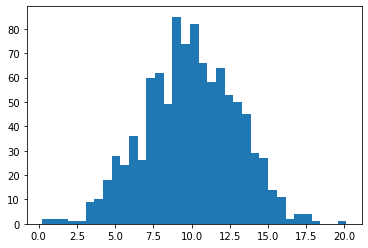

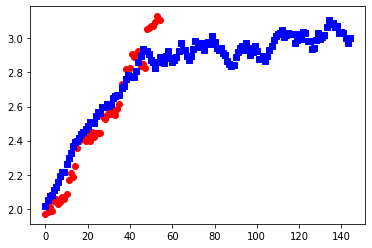

In [ ]:
# modified from the example shown at https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy

# generate 1000 random numbers following a Gaussian distribution with mu=10 and sigma=3
observation = np.random.normal(10, 3, 1000)

# fix the mu to the one observed in data and try to find the sigma
mu_obs = observation.mean()

# The tranistion model defines how to move from sigma_current to sigma_new
# fix the mean to be x[0]
# change the sigma (x[1]) from the current value to a new value that is uniformly distributed around the current value
transition_model = lambda x: [x[0], x[1]+0.1*(np.random.random()-0.5)]  

# mainly to make sure the new sigma is not a negative number
def prior(x):
    if(x[1] <= 0):
        return 0
    else:
        return 1

# Computes the likelihood of the data given a sigma
def log_lik_normal(x, data):
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept = np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))

# Metropolis algorithm
def metropolis_hastings(likelihood_calc, prior, transition_model, param_init, iterations, data, acceptance_rule):
    # likelihood_calc(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample for x[0] and x[1]
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)   # how to change sigma from the current value to the new value    
        x_lik = likelihood_calc(x, data)  # calculate the likelihood for the current value
        x_new_lik = likelihood_calc(x_new, data) # calculate the likelihood for the new value
        if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik+np.log(prior(x_new)))): # decie to keep the new value or not             
            x = x_new
            accepted.append(x_new)   
        else:
            rejected.append(x_new)   
                
    return np.array(accepted), np.array(rejected)

# here we fix the mean to the observed mu (mu_obs) and only try to find the sigma (the mu initial value is 2.)
accepted, rejected = metropolis_hastings(log_lik_normal, prior, transition_model, [mu_obs, 2.], 200, observation, acceptance)

# plot the accepted and rejected sigma values
plt.figure(211)
plt.hist(observation,bins=35)
plt.figure(212)
plt.plot(rejected[:, 1], 'ro') # plot the rejected sigma values
plt.plot(accepted[:, 1], 'bs')  # plot the accepted sigma values
plt.show()

# Text generation

In [ ]:
import numpy as np

# read in the text file and split it according to words
trump1 = "And that is whats happening. And it is going to get worse, because remember, Obamacare really kicks in 2016. Obama is going to be out playing golf. He might be on one of my courses."
trump2 = "I would invite him, I actually would say. I have the best courses in the world, so I would say, you what, if he wants to. I have one right next to the White House, right on the Potomac. If he would like to play, that is fine."
#display the data
trump = trump1 + trump2

print(trump)
corpus = trump.split()

# make a pair for all possible two neightboring words 
def make_pairs(corpus):
    for i in range(len(corpus) - 1):
        yield (corpus[i], corpus[i + 1])

# make a dictionary where each word is a key and all possible words after it is the element (stored as a list)
pairs = make_pairs(corpus)
word_dict = {}
for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]

# print out this dictionary
for key, values in word_dict.items():
    print(key, ' : ', values)

# randomly pick the first word and make sure it is a capitalized word
first_word = np.random.choice(corpus)
while first_word.islower():
    first_word = np.random.choice(corpus)
    
print("Let us start to prepare a fake speech with the initial word as: ", first_word)

# Start the chain from the picked word
chain = [first_word]

# Initialize the number of stimulated words
n_words = 10

# randomly pick up a word from the dictionary
for i in range(n_words): 
    # have to pay attention to the last word of the corpus since it does not have a word after it
    # and thus it may not be a valid key of the dictionary, but it is also possible that the last word
    # also showed up earlier
    key_word = chain[-1]
    if key_word in word_dict:   # if it is a valid key, then randomly pick a relevant word from the dictionary
        rand_word = np.random.choice(word_dict[key_word])
    else:                       # special case for the last word and we may find it to be an invalid key
        rand_word = np.random.choice(corpus)
    chain.append(rand_word)

# Join returns the chain as a string
print(' '.join(chain))

And that is whats happening. And it is going to get worse, because remember, Obamacare really kicks in 2016. Obama is going to be out playing golf. He might be on one of my courses.I would invite him, I actually would say. I have the best courses in the world, so I would say, you what, if he wants to. I have one right next to the White House, right on the Potomac. If he would like to play, that is fine.
And  :  ['that', 'it']
that  :  ['is', 'is']
is  :  ['whats', 'going', 'going', 'fine.']
whats  :  ['happening.']
happening.  :  ['And']
it  :  ['is']
going  :  ['to', 'to']
to  :  ['get', 'be', 'the', 'play,']
get  :  ['worse,']
worse,  :  ['because']
because  :  ['remember,']
remember,  :  ['Obamacare']
Obamacare  :  ['really']
really  :  ['kicks']
kicks  :  ['in']
in  :  ['2016.', 'the']
2016.  :  ['Obama']
Obama  :  ['is']
be  :  ['out', 'on']
out  :  ['playing']
playing  :  ['golf.']
golf.  :  ['He']
He  :  ['might']
might  :  ['be']
on  :  ['one', 'the']
one  :  ['of', 'right']
of

# Peak finder - simulated annealing

At each step, the simulated annealing algorithm considers some neighboring state $s^*$ of the current state $s$, and probabilistically decides between moving the system to state $s^*$ or staying in-state $s$. These probabilities ultimately lead the system to move to states of lower energy. Typically this step is repeated until the system reaches a state that is good enough for the application, or until a given computation budget has been exhausted. The probability of making the transition from the current state $s$ to a candidate new state $s^*$ is specified by an acceptance probability function $P(e,e^*,T)$ that depends on the energies $e=E(s)$ and $e^*=E(s^*)$ of the two states, and on a global time-varying parameter $T$ called the temperature. 

Simuated annealing method can deal with arbitrary systems and cost functions, statistically guarantees finding an optimal solution, relatively easy to code, and generally gives a ``good'' solution. It is often used when the search space is discrete. For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time, simulated annealing may be preferable to exact algorithms such as gradient descent.

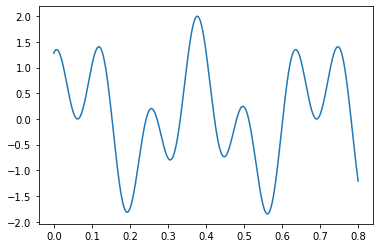

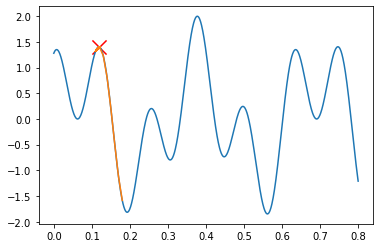

 step:  0  pos= 0.46846846846846846
 step:  50  pos= 0.012232531146692427
 step:  100  pos= 0.012232531146692427
 step:  150  pos= 0.006671795929547558
 step:  200  pos= 0.006671795929547558
 step:  250  pos= 0.9887734437041394
 step:  300  pos= 0.9887734437041394
 step:  350  pos= 0.9887734437041394
 step:  400  pos= 0.9967127761777124
 step:  450  pos= 0.37721334529575745
 step:  500  pos= 0.37721334529575745
 step:  550  pos= 0.37721334529575745
 step:  600  pos= 0.37721334529575745
 step:  650  pos= 0.37721334529575745
 step:  700  pos= 0.37721334529575745
 step:  750  pos= 0.37721334529575745
 step:  800  pos= 0.37721334529575745
 step:  850  pos= 0.37721334529575745
 step:  900  pos= 0.37721334529575745
 step:  950  pos= 0.37721334529575745


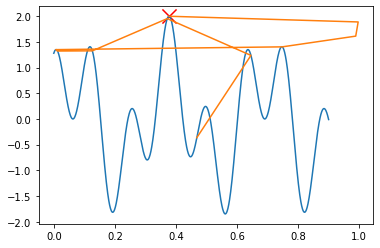

The global maximum is:  1.9995863852136564


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    if x<-1 or x>1:
        y = 0
    else:
        y = (np.cos(50*x) + np.sin(20*(x-0.3)))
    return y
hv = np.vectorize(h)  # vectorize the function

X = np.linspace(0, 0.8, 1000)
plt.plot(X, hv(X))  # have to use the vectorize version
plt.show()

# simple search for the maximum, will only find a local maximum near the starting point
def simple_maximum_search(func, start=0, N=100):
    x = start
    history = []

    for i in range(N):
        history.append(x)

        u = 0.01  # introduce a small difference to get two starting points
        xleft, xright = x-u, x+u
        yleft, yright = func(xleft), func(xright)

        if yleft > yright:
            x = xleft
        else:
            x = xright

    return x, history

x0, history = simple_maximum_search(hv, start=0.18, N=100)
plt.plot(X, hv(X))
plt.scatter(x0, h(x0), marker='x', s=200, color='red')
plt.plot(history, hv(history))
plt.show()   # not working for this case where we have many maxima

###############################
# simulated annealing
###############################
def simulated_annealing(search_space, func, T):
    scale = np.sqrt(T)

    start = np.random.choice(search_space)   # randomly pick up a data point in the whole space
    curr = start
    history = []

    for i in range(1000):
        history.append(curr)

        # proposed next step with a random number, the step becomes smaller for a next step
        prop = curr + np.random.normal() * scale  
        # check r > exp(-delta/T)
        if prop > 1 or prop < 0 or np.log(np.random.rand())*T>(func(prop) - func(curr)):
            prop = curr
        curr = prop

        if(i%50 == 0):
            print(" step: ", i, " pos=", curr)

        T = 0.9 * T   # reduce temperature by 10% for each interation
    return curr, history

np.random.seed(100)
X = np.linspace(0, 0.9, 1000)
xl, history = simulated_annealing(X, h, T=4)

plt.plot(X, hv(X))
plt.scatter(xl, hv(xl), marker='x', s=200, color='red')  # the global maximum
plt.plot(history, hv(history)) #hv(history))
plt.show()

print("The global maximum is: ", h(history[-1]))

# Salesman

Initial setup, total distance =  17.96799510217025


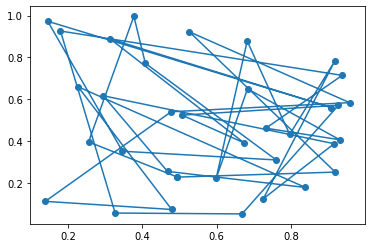

Final setup, total distance =  5.0895729371521305


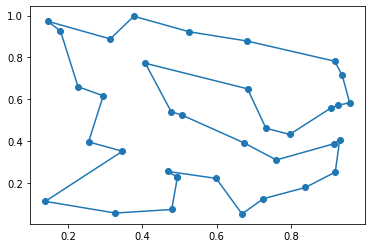

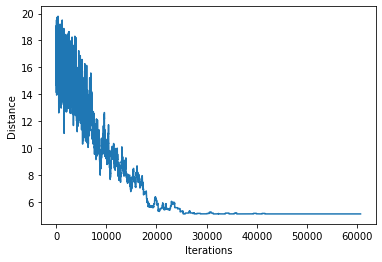

In [ ]:
from math import sqrt,exp
from random import random,randrange
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2+x[2]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations randomly and calculate the initial distance
N = 35
R = 0.02
np.random.seed(50)
r = np.empty([N+1, 3],float)
for i in range(N):
    r[i,0] = np.random.random()
    r[i,1] = np.random.random()
    r[i,2] = 0.
r[N] = r[0]
D = distance()
print("Initial setup, total distance = ", D)

#### initial setup
x_pts = []
y_pts = []
for i in range(N+1):
  x_pts.append(r[i][0])
  y_pts.append(r[i][1])
plt.scatter(x_pts, y_pts)
plt.plot(x_pts, y_pts)
plt.show()

#################################
# Main loop
#################################
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

t = 0
T = Tmax

distance_history = []

# here is the loop for the simulated annealing
while T > Tmin:          
    # Cooling as an exponential decay function
    t += 1
    T = Tmax*exp(-t/tau)

    # randomly choose two cities to swap and make sure they are distinct, equivalent to try all possible combinations
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD
    
    # If the move is rejected, swap them back again
    if random() > exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD

        # save distance for each step
        distance_history.append(D)

##### final setup
D = distance()
print("Final setup, total distance = ", D)

x_pts_new = []
y_pts_new = []
for i in range(N+1):
  x_pts_new.append(r[i][0])
  y_pts_new.append(r[i][1])
plt.scatter(x_pts_new, y_pts_new)
plt.plot(x_pts_new, y_pts_new)
plt.show()

# plot the distance history
plt.plot(distance_history)
plt.xlabel("Iterations")
plt.ylabel("Distance")
plt.show()